<a href="https://colab.research.google.com/github/gg5d/DS-3005/blob/main/MML_Python%2C_Ch_02_Linear_Algebra_GG_S24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.linalg as npl
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

In [2]:
InteractiveShell.ast_node_interactivity = "all"

# Chapter 02. Linear Algebra
## 2.1 Systems of Linear Equations
### Example 2.2

In [3]:
mat = np.vstack([[1,1,1],[1,-1,2],[2,0,3]])
sol = np.vstack([3,2,1])
try:
    npl.solve(mat,sol)
except:
    print(np.hstack([mat,sol]))
    print("Not solveable. Adding rows 1 and 2 contradicts row 3.")

[[ 1  1  1  3]
 [ 1 -1  2  2]
 [ 2  0  3  1]]
Not solveable. Adding rows 1 and 2 contradicts row 3.


In [4]:
mat = np.vstack([[1,1,1],[1,-1,2],[0,1,1]])
sol = np.vstack([3,2,2])
print(np.hstack([mat,sol]))
print("Solveable. Adding row 1 and 3 reveals x = 1, which fits with all rows.")
npl.solve(mat,sol)

[[ 1  1  1  3]
 [ 1 -1  2  2]
 [ 0  1  1  2]]
Solveable. Adding row 1 and 3 reveals x = 1, which fits with all rows.


array([[1.],
       [1.],
       [1.]])

In [8]:
mat = np.vstack([[1,1,1],[1,-1,2],[2,0,3]])
sol = np.vstack([3,2,5])
print(np.hstack([mat,sol]))
npl.solve(mat,sol)
#npl.lstsq(mat,sol,rcond=-1)[3] #Solution of coefficients multiplied with any # in R. I.e. Infinity of R solutions.

[[ 1  1  1  3]
 [ 1 -1  2  2]
 [ 2  0  3  5]]


LinAlgError: Singular matrix

#### Figure 2.3
The solution space of a system of two linear equations with two variables can be geometrically interepreted as the interesection of two lines. Every linear equation represents a line.

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
vals = np.linspace(-10,10,10000)

In [10]:
plt.rcParams["figure.figsize"] = (5,5)

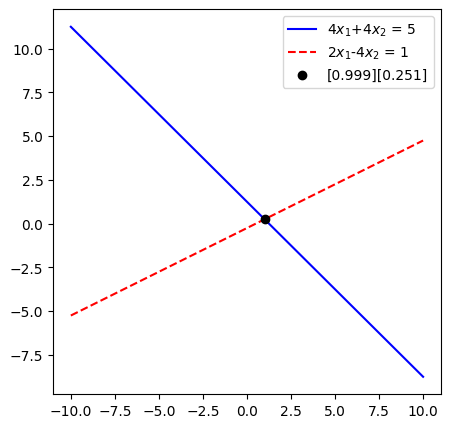

In [11]:
eq0 = lambda x1: (5-4*x1)/4 # 4x1+4x2 = 5
y0 = eq0(vals)

eq1 = lambda x1: (1-2*x1)/-4 # 2x1-4x2 = 1
y1 = eq1(vals)

plt.plot(vals,y0,c="blue")
plt.plot(vals,y1,"--",c="red")
idx = np.argwhere(np.diff(np.sign(y0 - y1))).flatten() # finds the intersection between two graphs
plt.plot(vals[idx],y0[idx],'ko')
plt.legend(["4$x_1$+4$x_2$ = 5","2$x_1$-4$x_2$ = 1",str(np.round(vals[idx],3)) + str(np.round(y0[idx],3))]);

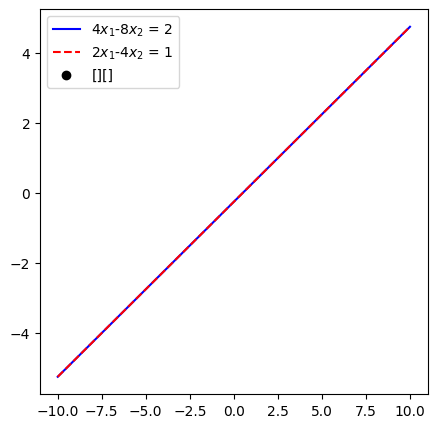

In [12]:
eq0 = lambda x1: (2-4*x1)/-8 # 4x1-8x2 = 2
y0 = eq0(vals)

eq1 = lambda x1: (1-2*x1)/-4 # 2x1-4x2 = 1
y1 = eq1(vals)

plt.plot(vals,y0,c="blue")
plt.plot(vals,y1,"--",c="red")
idx = np.argwhere(np.diff(np.sign(y0 - y1))).flatten() # finds the intersection between two graphs
plt.plot(vals[idx],y0[idx],'ko')
plt.legend(["4$x_1$-8$x_2$ = 2","2$x_1$-4$x_2$ = 1",str(np.round(vals[idx],3)) + str(np.round(y0[idx],3))]);

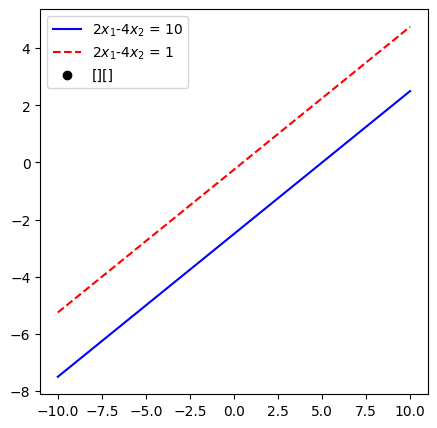

In [13]:
eq0 = lambda x1: (10-2*x1)/-4 # 2x1-4x2 = 10
y0 = eq0(vals)

eq1 = lambda x1: (1-2*x1)/-4 # 2x1-4x2 = 1
y1 = eq1(vals)

plt.plot(vals,y0,c="blue")
plt.plot(vals,y1,"--",c="red")
idx = np.argwhere(np.diff(np.sign(y0 - y1))).flatten() # finds the intersection between two graphs
plt.plot(vals[idx],y0[idx],'ko')
plt.legend(["2$x_1$-4$x_2$ = 10","2$x_1$-4$x_2$ = 1",str(np.round(vals[idx],3)) + str(np.round(y0[idx],3))]);

## 2.2 Matrices
#### Figure 2.4
*By stacking its columns, a matrix A can be represented as a long vector a.*

In [14]:
A = np.vstack([1.2,1.2,1.2,1.2])
B = np.vstack([2,2,2,2])
hAB = np.hstack([A,B])
vAB = np.vstack([A,B])
hAB
vAB

array([[1.2, 2. ],
       [1.2, 2. ],
       [1.2, 2. ],
       [1.2, 2. ]])

array([[1.2],
       [1.2],
       [1.2],
       [1.2],
       [2. ],
       [2. ],
       [2. ],
       [2. ]])

In [ ]:
C = np.einsum('il,lj',A,B)
# einsum takes a subscript that determines the operation of vector operations,
# this one yields same result as np.dot(A.T,B)*np.ones(np.shape(A))
C

array([[9.6],
       [9.6],
       [9.6],
       [9.6]])

### Example 2.3
To compute element $c_{ij}$ we multiply the elements of the $i$th row of $A$ with the $j$th column of $B$ and sum them up. We will call this the dot product of the correspodning row and column.

*Remark.* Matrices can only be multiplied if their neighborign dimensions match. For instance, an $n \times k$ matrix $A$ can be multipled with a $k \times m$ matrix $B$, but only from the left.

In [ ]:
A = np.matrix([[1,2,3],[3,2,1]])
B = np.matrix([[0,2],[1,-1],[0,1]])
A
B

matrix([[1, 2, 3],
        [3, 2, 1]])

matrix([[ 0,  2],
        [ 1, -1],
        [ 0,  1]])

In [ ]:
AB = np.dot(A,B)
print(AB)

[[2 3]
 [2 5]]


In [ ]:
BA = np.dot(B,A)
print(BA)

[[ 6  4  2]
 [-2  0  2]
 [ 3  2  1]]


In [ ]:
A.transpose()

matrix([[1, 3],
        [2, 2],
        [3, 1]])

#### Figure 2.5
*Even if both matrix multiplciations $AB$ and $BA$ are defined, the dimensions of the results can be different.*

In [ ]:
B@A
A@B #as seen above

matrix([[ 6,  4,  2],
        [-2,  0,  2],
        [ 3,  2,  1]])

matrix([[2, 3],
        [2, 5]])

### Example 2.4 (Inverse Matrix)
The matrices are inverse to each other since $AB = I = BA$.

In [ ]:
A = np.matrix([[1,2,1],[4,4,5],[6,7,7]])
B = np.matrix([[-7,-7,6],[2,1,-1],[4,5,-4]])
A
B
A*B
(A*B == (B*A)).all() == ((B*A) == np.eye(A.shape[0])).all()

matrix([[1, 2, 1],
        [4, 4, 5],
        [6, 7, 7]])

matrix([[-7, -7,  6],
        [ 2,  1, -1],
        [ 4,  5, -4]])

matrix([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

True

### Example 2.5 (Distributivity)

In [ ]:
C = np.matrix([[1,2],[3,4]])
lam = 2
phi = 3
C, lam, phi

(matrix([[1, 2],
         [3, 4]]),
 2,
 3)

In [ ]:
np.dot((lam+phi), C)
temp0 = np.dot(phi, C)
temp1 = np.dot(lam, C)
temp0+temp1

matrix([[ 5, 10],
        [15, 20]])

matrix([[ 5, 10],
        [15, 20]])

## 2.3 Solving Systems of Linear Equations

In [ ]:
A = np.matrix([[1,0,8,-4],[0,1,2,12]])
sol = np.vstack([42,8])
A
sol

matrix([[ 1,  0,  8, -4],
        [ 0,  1,  2, 12]])

array([[42],
       [ 8]])

One approach is to zero out the third and fourth column and take advantage of the identity matrix embedded as columns 1 and 2. This only returns a particular solution.

In [ ]:
np.dot(A,np.vstack([42,8,0,0]))

matrix([[42],
        [ 8]])

Another approach is to compose columns as vector operations of other columns, such as scalar multiplication and addition, and combine to find a general solution.

In [ ]:
# Here column three is composed of col 1 and 2, and 3 is inverted.
lam = 51345 # arbitrary scalar used to show the infinity of solutions.
np.dot(A,lam*np.vstack([A[:,2],-1,0]))

matrix([[0],
        [0]])

In [ ]:
# Here column four is composed of col 1 and 2, and 4 is inverted.
np.dot(A,lam*np.vstack([A[:,3],0,-1]))

matrix([[0],
        [0]])

In [ ]:
np.dot(A,np.vstack([42,8,0,0])) + np.dot(A,lam*np.vstack([A[:,2],-1,0]))  + np.dot(A,lam*np.vstack([A[:,3],0,-1]))

matrix([[42],
        [ 8]])

Because the above two vectors result in the 0 vector, they can be added to the particular solution and still yield the same result, meaning that the summation of the particular to the zeros, yields the general.

### Example 2.6
Elementary operations are key to solving systems of linear equations and involve the following.
1. Exchange of two equations, or rows in the matrix.
2. Multiplication of an equation, or row, with a constant $\lambda \in \mathbb{R}$.
3. Addition of two equation, or rows.

In [ ]:
a = 50 # for any arbitrary value a in R
A = np.vstack([[-2,4,-2,-1,4],[4,-8,3,-3,1],[1,-2,1,-1,1],[1,-2,0,-3,4]])
b = np.vstack([-3,2,0,a])
A
b
Ab = np.hstack([A,b])
Ab

array([[-2,  4, -2, -1,  4],
       [ 4, -8,  3, -3,  1],
       [ 1, -2,  1, -1,  1],
       [ 1, -2,  0, -3,  4]])

array([[-3],
       [ 2],
       [ 0],
       [50]])

array([[-2,  4, -2, -1,  4, -3],
       [ 4, -8,  3, -3,  1,  2],
       [ 1, -2,  1, -1,  1,  0],
       [ 1, -2,  0, -3,  4, 50]])

In [ ]:
Ab[[0,2]] = Ab[[2,0]] # Exchange of two equations. I.e. swap row 1 and 3.
Ab

array([[ 1, -2,  1, -1,  1,  0],
       [ 4, -8,  3, -3,  1,  2],
       [-2,  4, -2, -1,  4, -3],
       [ 1, -2,  0, -3,  4, 50]])

In [ ]:
Ab[3] -= Ab[0] # Addition of two equation, or rows. Subtract row 1 from 4.
Ab

array([[ 1, -2,  1, -1,  1,  0],
       [ 4, -8,  3, -3,  1,  2],
       [-2,  4, -2, -1,  4, -3],
       [ 0,  0, -1, -2,  3, 50]])

In [ ]:
Ab[2] += 2*Ab[0] # Addition of two equation, or rows. Add 2 * row 1 to row 3.
Ab

array([[ 1, -2,  1, -1,  1,  0],
       [ 4, -8,  3, -3,  1,  2],
       [ 0,  0,  0, -3,  6, -3],
       [ 0,  0, -1, -2,  3, 50]])

In [ ]:
Ab[1] -= 4*Ab[0] # Addition of two equation, or rows. Subtract 4 * row 1 to row 2
Ab

array([[ 1, -2,  1, -1,  1,  0],
       [ 0,  0, -1,  1, -3,  2],
       [ 0,  0,  0, -3,  6, -3],
       [ 0,  0, -1, -2,  3, 50]])

In [ ]:
Ab[3] += -Ab[1] - Ab[2] # Addition of two equation, or rows. Add -Row 2 - Row 3
Ab

array([[ 1, -2,  1, -1,  1,  0],
       [ 0,  0, -1,  1, -3,  2],
       [ 0,  0,  0, -3,  6, -3],
       [ 0,  0,  0,  0,  0, 51]])

In [ ]:
Ab[1] *= -1 # Multiplication of an equation, or row, with a constant. Invert row 2
Ab = Ab.astype(float)
Ab[2] *= -1/3 # Multiplication of an equation, or row, with a constant. Divide row 3 by -3
Ab

array([[ 1., -2.,  1., -1.,  1.,  0.],
       [ 0.,  0.,  1., -1.,  3., -2.],
       [-0., -0., -0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0., 51.]])

We see that if a had been -51 we would have a solution, that is, the sum of the left hand side for the final row is 0, only if a is `-51`.

In [ ]:
Ab[:,5][3] -= a+1
Ab

array([[ 1., -2.,  1., -1.,  1.,  0.],
       [ 0.,  0.,  1., -1.,  3., -2.],
       [-0., -0., -0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

Now we can see that for the first row, we can find a particular solution.
**Incomplete.** Ambiguity on how the general solution was found. Worth expanding this exercise.

In [ ]:
np.dot(Ab[0][:5],np.array([2,0,-1,1,0]))

0.0

In [ ]:
# alternatively
from sympy import *

In [ ]:
M = Matrix([[-2,4,-2,-1,4, -3],[4,-8,3,-3,1, 2],[1,-2,1,-1,1,0],[1,-2,0,-3,4,a]])
M

Matrix([
[-2,  4, -2, -1, 4, -3],
[ 4, -8,  3, -3, 1,  2],
[ 1, -2,  1, -1, 1,  0],
[ 1, -2,  0, -3, 4, 50]])

In [ ]:
M_rref = M.rref()
M_rref

(Matrix([
 [1, -2, 0, 0, -2, 0],
 [0,  0, 1, 0,  1, 0],
 [0,  0, 0, 1, -2, 0],
 [0,  0, 0, 0,  0, 1]]),
 (0, 2, 3, 5))

### Example 2.7 (Reduced Row Echelon Form)

In [ ]:
A = np.vstack([[1,3,0,0,3],[0,0,1,0,9],[0,0,0,1,-4]])
A

array([[ 1,  3,  0,  0,  3],
       [ 0,  0,  1,  0,  9],
       [ 0,  0,  0,  1, -4]])


*Look for solutions of Ax = 0 by looking at non-pivot columns*.

1. The 2nd column is 3 times the 1st column.
2. To obtain 0 we subtract the 2nd column from three times the 1st column.
3. The 5th column is our 2nd non-pivot. It can be expressed as 3 times the 1st pivot column,
    9 times the 2nd pivot column, and -4 times the 3rd pivot column.
4. Track the indices of the pivot columns and translate this into:
    1. 3 times the 1st pivot column,
    2. 0 times the 2nd column, (the 1st non-pivot)
    3. 9 times the 3rd column, and (the 2nd pivot column)
    4. -4 times the 4th column  (the 3rd pivot column)
5. Subtract the 5th column to obtain 0.

In [ ]:
A[:,1] == A[:,0]*3 #step 1

array([ True,  True,  True])

In [ ]:
A[:,0]*3 + A[:,1]*-1 #step 2
A @ np.vstack([3,-1,0,0,0])

array([0, 0, 0])

array([[0],
       [0],
       [0]])

In [ ]:
A[:,4] #step 3
A[:,0]*3 + A[:,2]*9 + A[:,3]*-4

array([ 3,  9, -4])

array([ 3,  9, -4])

In [ ]:
A[:,0]*3 #step 4
A[:,1]*0
A[:,2]*9
A[:,3]*-4
A[:,4] + A[:,4]*-1 #step 5
A @ np.vstack([3,0,9,-4,-1])
# Which leaves us with our solution of the vectors [3,-1,0,0,0],[3,0,9,-4,-1],
# respectively scalable by lam 1 and 2.

array([3, 0, 0])

array([0, 0, 0])

array([0, 9, 0])

array([ 0,  0, -4])

array([0, 0, 0])

array([[0],
       [0],
       [0]])

### Example 2.8 (Minus-1 Trick)

In [ ]:
A1 = A
A1

array([[ 1,  3,  0,  0,  3],
       [ 0,  0,  1,  0,  9],
       [ 0,  0,  0,  1, -4]])

The trick is to have the diagonal have either 1 or -1.

In [ ]:
A1 = np.insert(A1,1,np.array([0,-1,0,0,0]),0)
A1 = np.insert(A1,4,np.array([0,0,0,0,-1]),0)
A1

array([[ 1,  3,  0,  0,  3],
       [ 0, -1,  0,  0,  0],
       [ 0,  0,  1,  0,  9],
       [ 0,  0,  0,  1, -4],
       [ 0,  0,  0,  0, -1]])

Which gives us the solution from Example 2.7 above in columns 2 and 5.

### Example 2.9 (Calculating an Inverse Matrix by Gaussian Elimination)

In [ ]:
A = np.vstack([[1,0,2,0],[1,1,0,0],[1,2,0,1],[1,1,1,1]])
aug = np.eye(np.shape(A)[0])
A
aug

array([[1, 0, 2, 0],
       [1, 1, 0, 0],
       [1, 2, 0, 1],
       [1, 1, 1, 1]])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
Aaug = np.hstack([A,aug])
Aaug

array([[1., 0., 2., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 0.],
       [1., 2., 0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1.]])

In [ ]:
npl.inv(A) # Gaussian elimination as above, yields this as the RHS.

array([[-1.,  2., -2.,  2.],
       [ 1., -1.,  2., -2.],
       [ 1., -1.,  1., -1.],
       [-1.,  0., -1.,  2.]])

In [ ]:
#The inverse of a matrix is in essence the solution to the matrix given that it represents a system of equations.
#This can be verified via AA^-1 = I
np.dot(A,npl.inv(A))

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## 2.4 Vector Spaces

One major idea in mathematics is the idea of “closure”. This is the question: What is the set of all things that can result from my proposed operations? In the case of vectors: What is the set of vectors that can result by
starting with a small set of vectors, and adding them to each other and
scaling them? This results in a vector space.

A group is a set of elements and an operation defined on these elements that keeps some structure of the set intact.

### Example 2.10 (Groups)
*Book provides examples of sets and operations.* Might return to this and show how each example does or doesn't satisfy closure, associativity, neutrality, invertability.
### Example 2.11 (Vector Spaces)
*Book provides general example.*
### Example 2.12 (Vector Subspaces)
*Book provides general examples, except the reference to Figure 2.6.*
#### Figure 2.6
*Not all subsets of $\mathbb{R}^2$ are subspaces. In A and C, the closure property is violated , B does not contain 0. Only D is a subspace.*

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)

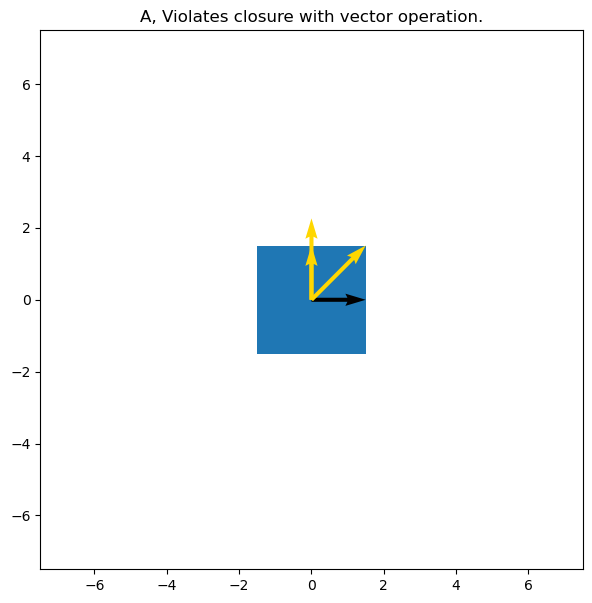

In [ ]:
'''
"In A and C, the closure property is violated".

For A this doesn't work because for any x and y within the vector space,
multiplying x and y might not still be in the vector space. Ergo, closure violated.

Of course, if A was a unit (1) vector, closure property would still hold.
E.g.: .9 * .9 = smaller than .9; 1.1*1.1 = bigger than 1.1)

For C, a shift could occur that bumps a vector outside of this vector space.
'''

origin = np.vstack([0,0])
v = 1.5
scale = v*10
vec = np.array([v,0])
vec1 = np.array([1.5,1.5])
vec2 = np.array([0,1.5])
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.fill_between(np.linspace(-v,v,100),np.linspace(v,v,100),np.linspace(-v,-v,100)) # vector space
plt.quiver(*origin, *vec, scale = scale)
plt.quiver(*origin, *vec1, scale = scale, color = "gold")
plt.quiver(*origin, *vec2, scale = scale, color = "gold")
plt.quiver(*origin, *np.array(vec1*vec2), scale = scale,color = "gold") # operation on vec 1 with vec 2
plt.title("A, Violates closure with vector operation.");

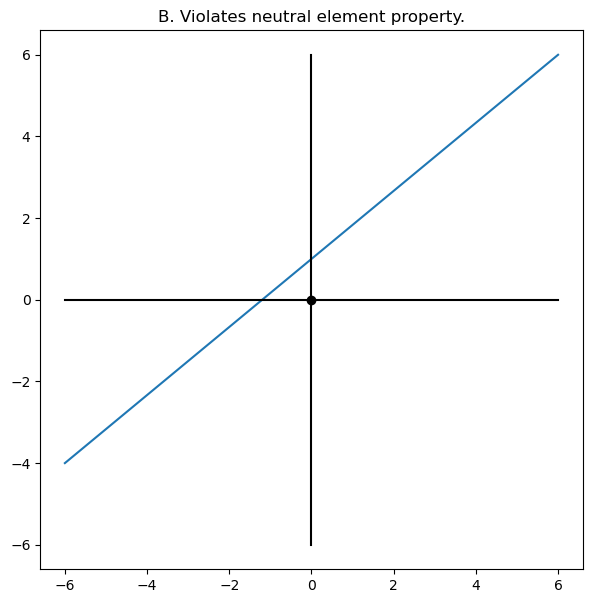

In [ ]:
plt.plot(np.linspace(-6,6,100),np.linspace(-6,4,100)+2)
plt.plot(np.linspace(-6,6,100),np.linspace(0,0,100),color="k")
plt.plot(np.linspace(0,0,100),np.linspace(-6,6,100),color="k")
plt.scatter(0,0,color="k")
plt.title("B. Violates neutral element property.");

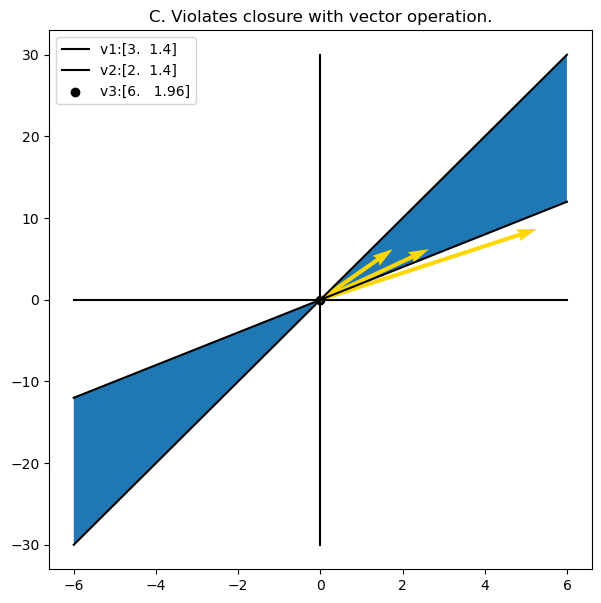

In [ ]:
xs = np.linspace(-6,6,100)
y1 = np.linspace(-6*2,6*2,100)
y2 = np.linspace(-6*5,6*5,100)

plt.plot(xs,np.linspace(0,0,100),color="k") #0
plt.plot(np.linspace(0,0,100),np.linspace(-30,30,100),color="k") #0
plt.scatter(0,0,color="k") #0

plt.plot(xs,y1, color = "k")
plt.plot(xs,y2, color = "k")

plt.fill_between(xs,y1,y2) # vector space
v1 = np.array([3,1.4]) # represents slope of vector
v2 = np.array([2,1.4])
v3 = v2*v1

plt.quiver(*origin,*v1,scale = scale, color = "gold") # v1
plt.quiver(*origin,*v2,scale = scale, color = "gold") # v2
plt.quiver(*origin,*v3,scale = scale, color = "gold") # v3
plt.legend(["v1:"+str(v1),"v2:"+str(v2),"v3:"+str(v3)])
plt.title("C. Violates closure with vector operation.");

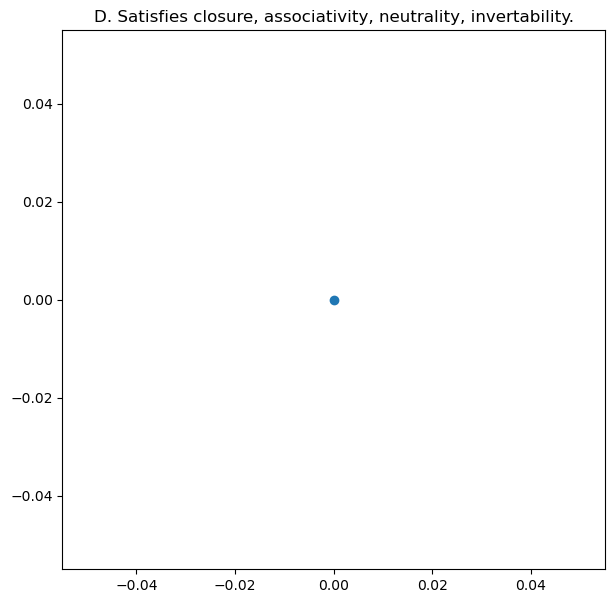

In [ ]:
plt.scatter(0,0)
plt.title("D. Satisfies closure, associativity, neutrality, invertability.");

## 2.5 Linear Independence
Given a vector v1, that can be represented as some operation with another vector, v2, such as $\times 2$, v1 and v2 are said to be linearly dependent. If v1 cannot be represented as an operation with another vector, v3, they are said to be linearly independent.

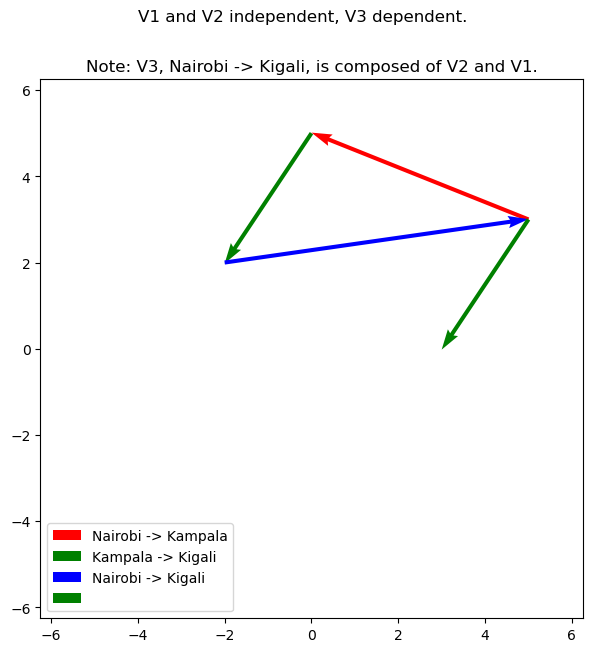

In [ ]:
origin = np.array([5,3])
scale = 12.5

v1 = np.array([-5,2])
v2 = np.array([-2,-3])
v3 = -v2-v1 # Here V3 is composed of v2 and v1, so is said to be linearly dependent.

plt.quiver(*origin, *v1, scale = scale, color = "r")
plt.quiver(*origin+v1, *v2, scale = scale, color = "g")
plt.quiver(*origin+v1+v2, *v3, scale = scale, color = "b")
plt.quiver(*origin, *v2, scale = scale, color = "g")

plt.legend(["Nairobi -> Kampala","Kampala -> Kigali","Nairobi -> Kigali",""], loc = 3)
plt.axis([-scale/2,scale/2,-scale/2,scale/2]);
plt.title("Note: V3, Nairobi -> Kigali, is composed of V2 and V1.")
plt.suptitle("V1 and V2 independent, V3 dependent.");

### Example 2.14

In [ ]:
A = Matrix([[1,1,-1],[2,1,-2],[-3,0,1],[4,2,1]])
A
A.rref()

Matrix([
[ 1, 1, -1],
[ 2, 1, -2],
[-3, 0,  1],
[ 4, 2,  1]])

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 0]]),
 (0, 1, 2))

Because every column is a pivot column, there is no non=trivial solution, thus $\lambda_{1,2,3} = 0$, and the column vectors $x_{1,2,3}$ are linearly independent.

### Example 2.15

In [ ]:
A = Matrix([[1,-4,2,17],[-2,-2,3,-10],[1,0,-1,11],[-1,4,-3,1]])
A
A.rref()

Matrix([
[ 1, -4,  2,  17],
[-2, -2,  3, -10],
[ 1,  0, -1,  11],
[-1,  4, -3,   1]])

(Matrix([
 [1, 0, 0,  -7],
 [0, 1, 0, -15],
 [0, 0, 1, -18],
 [0, 0, 0,   0]]),
 (0, 1, 2))

Because the last column is not a pivod column, we know the system is non-trivially solvable, thus the column vectors $x_{1,2,3,4}$ are linearly dependent as we know $x_4$ can be expressed as a linear combination of $x_{1,2,3}$.

## 2.6 Basis and Rank
A basis is a set of vectors which are linearly independent and can be used to determine all vectors in a vector space.

The total number of linearly independent columns of a matrix and the total number of linearly independent rows are always equal, this value is considered the rank of a matrix.

### Example 2.16

In [ ]:
origin3D = np.array([0,0,0])
basis3D1 = np.vstack([[1,0,0],[0,1,0],[0,0,1]]) #standard basis
basis3D2 = np.vstack([[1,1,1],[0,1,1],[0,0,1]]) #b1, 2.79
basis3D3 = np.vstack([[.5,1.8,-2.2],[.8,.3,-1.3],[.4,.3,3.5]]) #b2, 2.79
bases = [basis3D1,basis3D2,basis3D3]
basis3D1
basis3D2
basis3D3

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])

array([[ 0.5,  1.8, -2.2],
       [ 0.8,  0.3, -1.3],
       [ 0.4,  0.3,  3.5]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams[ "figure.figsize" ] = (10,10)

/var/folders/r3/7htkgg750xxfbpfv1jj4443c0000gp/T/ipykernel_63223/1713975796.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


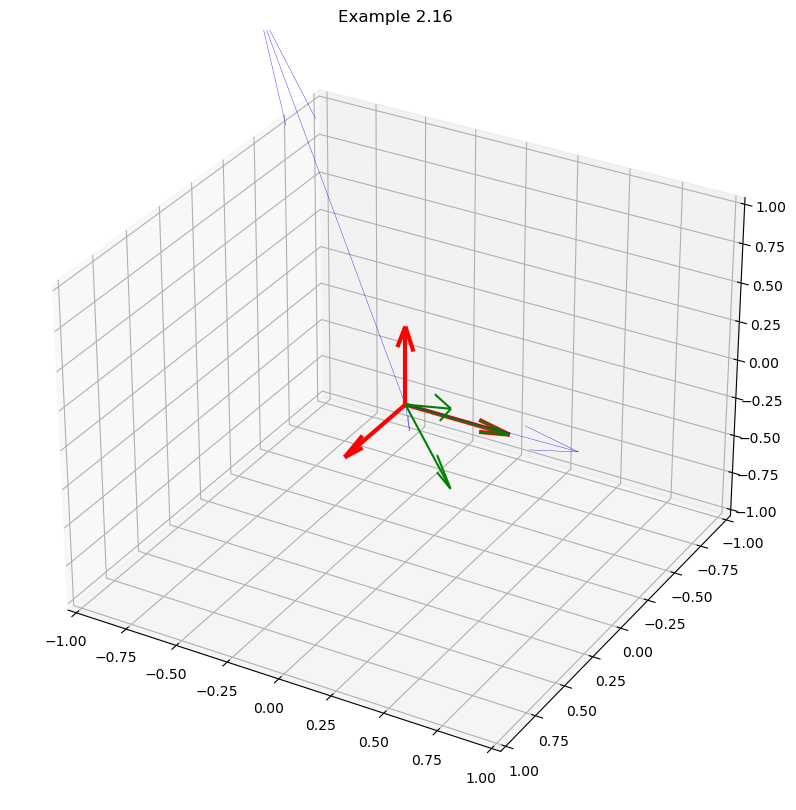

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
scale3D = 1
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)

c = ["r","g","b"]
lw = [3,1.5,.25]
for ind,base in enumerate(bases):
    for j,v in enumerate(base):
        ax.quiver(*origin3D,*base[:,j],length=scale3D/2, color=c[ind], linewidths=lw[ind])

plt.title("Example 2.16");

The above are examples of basis, a collection of vectors that can be used to represent other vectors in a space.

In [ ]:
A = Matrix([[1,2,1],[2,-1,1],[3,0,0],[4,2,-4]])
A
A.rref()

Matrix([
[1,  2,  1],
[2, -1,  1],
[3,  0,  0],
[4,  2, -4]])

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 0]]),
 (0, 1, 2))

The above matrix, $A$, is linearly independent as we can see that all column vectors are pivots, but is not a generating set, and thus not a basis for $\mathbb{R}^4$, as a vector like $[1,0,0,0]^T$ is unobtainable from a combination of the column vectors in $A$. I.e. there exists no multiplication or addition between the column vectors that would create the linearly independent column vector $[1,0,0,0]^T$ shown in the above performed `rref()`.

### Example 2.17 (Determining a Basis)

In [ ]:
A = Matrix([[1,2,3,-1],[2,-1,-4,8],[-1,1,3,-5],[-1,2,5,-6],[-1,-2,-3,1]])
A.rref()

(Matrix([
 [1, 0, -1, 0],
 [0, 1,  2, 0],
 [0, 0,  0, 1],
 [0, 0,  0, 0],
 [0, 0,  0, 0]]),
 (0, 1, 3))

The three pivot columns, $x_{1,2,4}$, determined by `rref()` can be used a basis, as they can only be solved with $\lambda_{1,2,4} = 0$.

### Example 2.18 (Rank)

In [ ]:
A = Matrix([[1,0,1],[0,1,1],[0,0,0]])
len(A.rref()[1]) #rank of this matrix = how many linearly independent columns or rows exist.

2

In [ ]:
A = Matrix([[1,2,1],[-2,-3,1],[3,5,0]])
len(A.rref()[1])

2

## 2.7 Linear Mappings
Given two vectors and a function, if the function applied to the vectors either via application to each and then either added or multiplied, or in application to the vectors added or multiplied to each other, yield the same results, then we have a mapping function between vectors that is linear, also known as a linear map, also known as a homomorphism.

Also, linear mappings can be considered injective, meaning there is strictly a one-to-one mapping from on space to another and that not all elements in the other have to have been mapped from the first  (one-to-one), surjective, meaning every element in the second space is mapped to (onto), or bijective, meaning there is a one to one mapping that maps all elements from A to all elements in B (both).

### Example 2.19 (Homomorphism)
*Book provides general example for $\mathbb{R}^2 \rightarrow \mathbb{C}$.*

#### Figure 2.8
*Two different coordinate systems defined by two sets of basis vectors. A vector $x$ has different coordiante representations depending on which coordinate system is chosen.*

In [ ]:
plt.rcParams[ "figure.figsize" ] = (5,5)

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

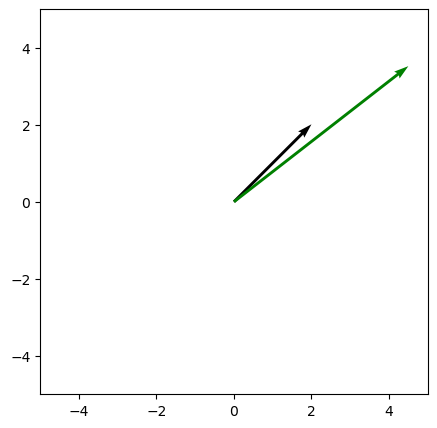

In [ ]:
origin = np.array([0,0])
standardBasis = np.vstack([[1,0],[0,1]])
altBasis = np.vstack([[1.5,.75],[.25,1.5]])
v1 = lambda b: np.dot(b,np.array([2,2]))
scale = 10
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.quiver(*origin,*v1(standardBasis),scale=scale,color="k")
plt.quiver(*origin,*v1(altBasis),scale=scale,color="g")
plt.quiver(*origin,*standardBasis,scale=scale,color="k")
plt.quiver(*origin,*altBasis,scale=scale,color="g");

### Example 2.20

In [ ]:
vec = lambda b: np.dot(b,np.vstack([2,3]))
altBasis = np.vstack([[1,1],[-1,1]])
altBasis
vec(standardBasis)

array([[ 1,  1],
       [-1,  1]])

array([[2],
       [3]])

#### Figure 2.9

In [ ]:
vec(standardBasis)
vec(altBasis)

array([[2],
       [3]])

array([[5],
       [1]])

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

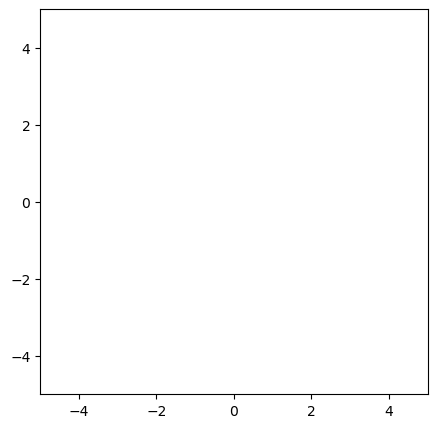

In [ ]:
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.quiver(*origin,*standardBasis, scale = scale, color ="r")
plt.quiver(*origin,*altBasis, scale = scale,color="g")
plt.quiver(*origin, *vec(standardBasis), width=.01,scale=scale,color="k")
plt.quiver(*origin, *vec(altBasis), width=.01, scale=scale,color="k");
plt.quiver(*origin, *np.dot(altBasis,np.vstack([-1/2,5/2])), width=.007, scale=scale, color="gold")
plt.legend(["standard basis","alt basis","vec(standard)","vec(alt)","vec(standard) w.r.t. alt."], loc = 3);

Whereas the same vector might be mapped to a new location, we could still find the same initial vector using the alternative basis, with new coordinates with respect to the alternative basis.

To find the new coordinates we could consider that the previous basis was transformed to a new location, then apply that transformation to the new position of our initial vector, to find the initial coordiantes with respect to the new basis.

Assume there exists a transformation matrix, `tMat`, such that $TU = V$.
$$
TUU^{-1} = VU^{-1}, \\
\therefore T = VU^{-1}
$$.

In [ ]:
tMat = np.dot(altBasis , npl.inv(standardBasis))
givenAlt = np.dot(altBasis,np.vstack([-1/2,5/2]))
undoT = np.dot(npl.inv(tMat), vec(altBasis))
tMat
givenAlt
undoT

array([[ 1.,  1.],
       [-1.,  1.]])

array([[2.],
       [3.]])

array([[2.],
       [3.]])

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

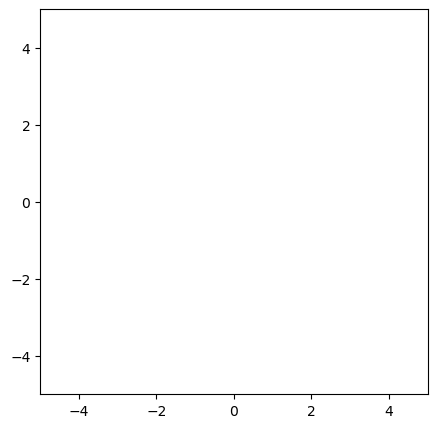

In [ ]:
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.quiver(*origin,*standardBasis, scale = scale, color ="r")
plt.quiver(*origin,*altBasis, scale = scale,color="g")
plt.quiver(*origin, *vec(standardBasis), width=.01,scale=scale,color="k")
plt.quiver(*origin, *vec(altBasis), width=.01, scale=scale,color="k");
plt.quiver(*origin, *givenAlt, width=.007, scale=scale, color="gold")
plt.quiver(*origin, *undoT, width=.003, scale=scale, color="cyan")
plt.legend(["standard basis","alt basis","vec(standard)","vec(alt)","givenAlt", "undoT"], loc = 3);

### Example 2.21 (Transformation Matrix)
*Book provides example for formatting a transformation matrix given a set of homomorphisms.*
### Example 2.22 (Linear Transformations of Vectors)
#### Figure 2.10
Three examples of linear transformations of the vectors shown as dots in (a); (b) Rotation by $45^{\circ}$; (c) Stretching of the horizontal coordinates by 2; (d) Combination of reflection, rotation and stretching.

In [ ]:
original = np.vstack([[i,j] for i in np.linspace(-1,1,20) for j in np.linspace(-1,1,20)])
# There might be some alternate trick doing something like np.meshgrid but this will do.
A1 = lambda theta: np.vstack([[np.cos(theta), -np.sin(theta)],
                              [np.sin(theta),np.cos(theta)]])
A2 = np.vstack([[2,0],
                [0,1]])
A3 = np.vstack([[3,-1],
                [1,-1]])*(1/2)
original[:2]
A1(np.pi/4)
A2
A3

array([[-1.        , -1.        ],
       [-1.        , -0.89473684]])

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

array([[2, 0],
       [0, 1]])

array([[ 1.5, -0.5],
       [ 0.5, -0.5]])

In [ ]:
colors = np.vstack([[i,0,j] for i in np.linspace(0,1,20) for j in np.linspace(1,0,20)])
originalA1 = np.dot(A1(np.pi/4), original.T).T

# Order of dot product matters here, the transformation matrix is applied to the column wise data,
# if the original is dotted first transformations aren't applied correctly:
# A is rotated CCW instead of CW, and D is skewed wrt to the y axis rather than x axis.

originalA2 = np.dot(A2, original.T).T
originalA3 = np.dot(A3, original.T).T
originalA1[:2]
originalA2[:2]
originalA3[:2]

array([[-1.11022302e-16, -1.41421356e+00],
       [-7.44322928e-02, -1.33978127e+00]])

array([[-2.        , -1.        ],
       [-2.        , -0.89473684]])

array([[-1.        ,  0.        ],
       [-1.05263158, -0.05263158]])

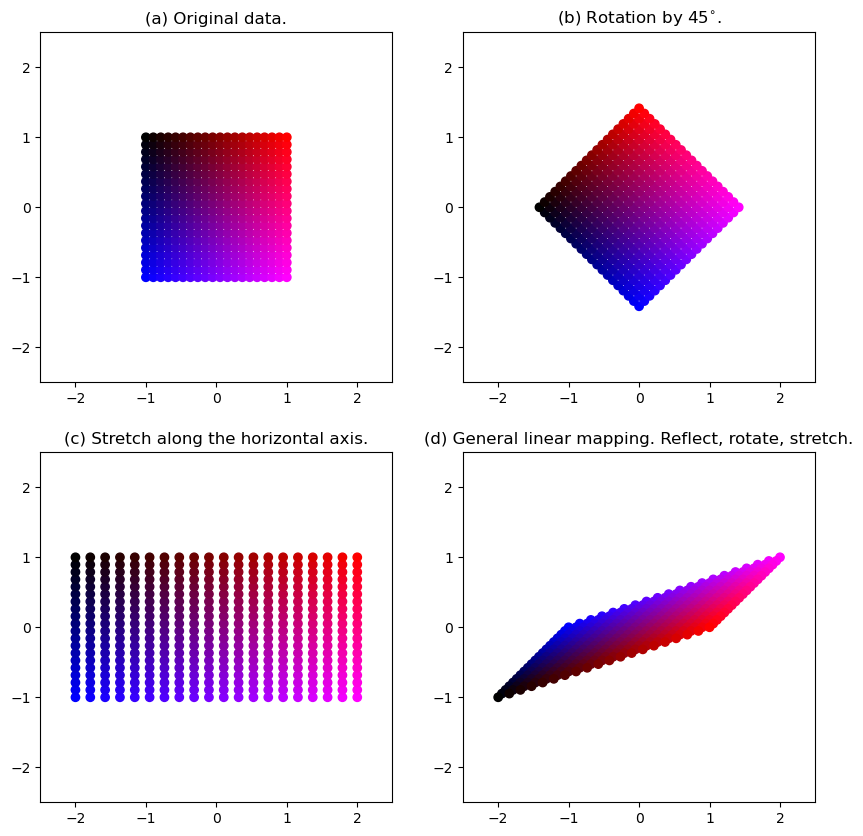

In [ ]:
fig,a = plt.subplots(2,2, figsize=(10,10))
plt.setp(a, xlim=(-scale/4,scale/4), ylim=(-scale/4,scale/4))
a[0][0].scatter(original[:,0],original[:,1], c = colors)
a[0][0].set_title("(a) Original data.")

a[0][1].scatter(originalA1[:,0], originalA1[:,1], c = colors)
a[0][1].set_title(r"(b) Rotation by $45^{\circ}$.")

a[1][0].scatter(originalA2[:,0], originalA2[:,1], c = colors)
a[1][0].set_title("(c) Stretch along the horizontal axis.")

a[1][1].scatter(originalA3[:,0], originalA3[:,1], c = colors)
a[1][1].set_title("(d) General linear mapping. Reflect, rotate, stretch.");

### Example 2.23 (Basis Change)

In [ ]:
A = np.vstack([[2,1],[1,2]]) # transformation matrix wrt standard basis
B = np.vstack([[1,1],[1,-1]]) # given a new basis, what is the new transformation matrix?
A
B
standardBasis

array([[2, 1],
       [1, 2]])

array([[ 1,  1],
       [ 1, -1]])

array([[1, 0],
       [0, 1]])

In [ ]:
T = np.dot(A,npl.inv(B)) #the transformation from A to B can be found as the dot product between A and inv(B)
Atilde = np.dot(B,T) #we then apply the transformation to B to reveal Atilde
B
T
Atilde

array([[ 1,  1],
       [ 1, -1]])

array([[ 1.5,  0.5],
       [ 1.5, -0.5]])

array([[3., 0.],
       [0., 1.]])

#### Figure 2.11
*Book shows the general relationship between vector spaces, and a set of transformations and their bases.*
### Example 2.24 (Basis Change)

In [ ]:
Aphi = np.vstack([[1,2,0],[-1,1,3],[3,7,1],[-1,2,4]])
B = np.eye(3)
C = np.eye(4)
#These are given new bases, and we seek to find the new transformation matrix based on these new bases.
S = np.vstack([[1,0,1],[1,1,0],[0,1,1]]) #2.120
T = np.vstack([[1,1,0,1],[1,0,1,0],[0,1,1,0],[0,0,0,1]])

In [ ]:
np.dot(npl.inv(T),np.dot(Aphi,S)) # Using same method as above.

array([[-4., -4., -2.],
       [ 6.,  0.,  0.],
       [ 4.,  8.,  4.],
       [ 1.,  6.,  3.]])

#### Figure 2.12
*Book provides the visualization for the relationship between Kernel and Image of a linear mapping.*

### Example 2.25 (Image and Kernel of a Linear Mapping)

The image of a linear mapping, or function is the set of vectors returned from applying that function to a vector space, or the subspace returned by applying a function to a vector space. The kernel of a function is the set of vectors in that subspace, that return zero, when the function is applied to them. **I.e.** When a function is applied, we ask for image: What vectors are made the subspace? and for kernel: What vectors are sent to 0?

*Recall Span:* Given two or more vectors, it is useful to know over what vector space any linear combination of the vectors could yield, which is called the span of these vectors.

In order to find the image we're solving for, we're looking for the set of vectors that are sent to the subspace by our linear mapping. So we simply say the image is the span of `phi`. In order to find the kernel we're solving for the set of vectors in a subspace that are sent to 0. I.e. Ax = 0, to do so we find the basis of the `rref` of our matrix, or the span of the columns that form a basis of our reduced echelon form, are our kernel.

```python
'''
Image = span(phi)
Kernel = span(basis(rref(phi)))
'''
```

In [ ]:
Phi = Matrix([[1,2,-1,0],[1,0,0,1]])
Phi
PhiReduced = np.array(Phi.rref()[0]).astype(np.float64)
Matrix(PhiReduced)

Matrix([
[1, 2, -1, 0],
[1, 0,  0, 1]])

Matrix([
[1.0,   0,    0,  1.0],
[  0, 1.0, -0.5, -0.5]])

In [ ]:
#minus-1 trick
PhiReduced = np.insert(PhiReduced,2,np.array([0,0,-1,0]),0)
PhiReduced = np.insert(PhiReduced,3,np.array([0,0,0,-1]),0)
PhiReduced

array([[ 1. ,  0. ,  0. ,  1. ],
       [ 0. ,  1. , -0.5, -0.5],
       [ 0. ,  0. , -1. ,  0. ],
       [ 0. ,  0. ,  0. , -1. ]])

In [ ]:
basisPhiR = PhiReduced[:,2:4]*-1
basisPhiR

array([[-0. , -1. ],
       [ 0.5,  0.5],
       [ 1. , -0. ],
       [-0. ,  1. ]])

We cannot visualize the image of the above as it is in $\mathbb{R}^4$, but for the kernel, which is in $\mathbb{R}^2$, we can, this is because the image is the span of the columns (size 4), and the kernel is a span of the rows (size 2).

In [ ]:
import random
plt.rcParams[ "figure.figsize" ] = (10,10)

In [ ]:
def span(vecs,n,ray=True):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d(-scale/2,scale/2)
    ax.set_ylim3d(scale/2,-scale/2)
    ax.set_zlim3d(-scale/2,scale/2)

    # If we were to iterate a scalar operation on a set of vectors n amount of times.
    if ray:
        for i in list(range(n)):
            # A scalar operation on each vector in our set with a random value
            fin = np.vstack([vecs[:,i]*random.uniform(-scale/2,scale/2) for i in
                                         list(range(np.shape(vecs)[1]))])
            # Summing set of vectors row-wise
            vec = np.array([sum(fin[:,i]) for i in list(range(np.shape(fin)[1]))])
            ax.quiver(*origin,*vec,color = "gold", linewidths = .5,arrow_length_ratio = .05)

    for i in list(range(np.shape(vecs)[1])):
        v = np.array(vecs[:,i])
        ax.quiver(*origin, *v, color = "k", linewidths = 3,arrow_length_ratio = .05)

/var/folders/r3/7htkgg750xxfbpfv1jj4443c0000gp/T/ipykernel_63223/114495541.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


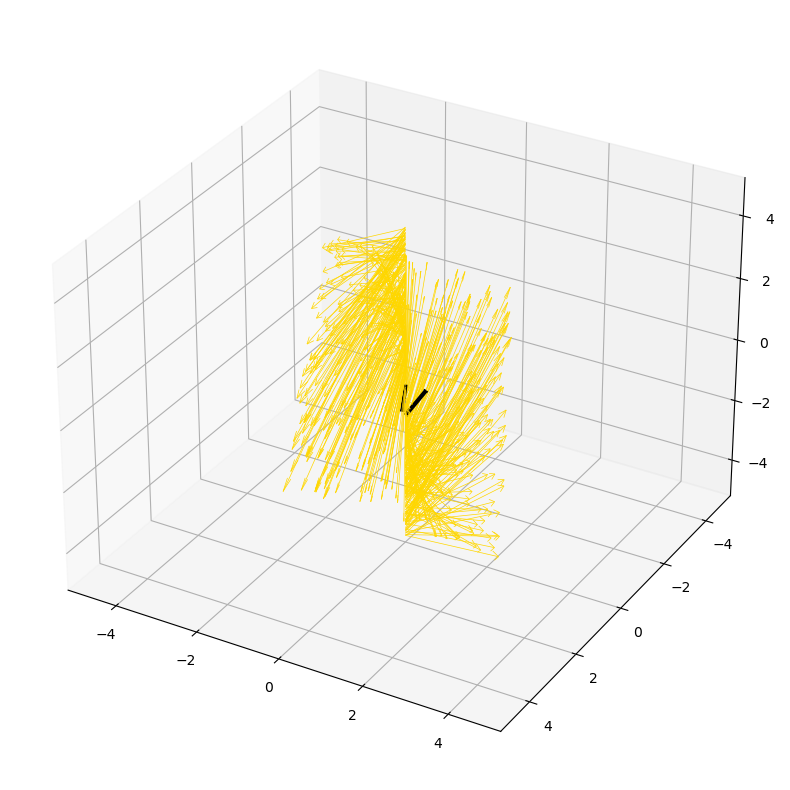

In [ ]:
span(basisPhiR,500)

The above is a visualization of the kernel (vectors sent to 0), of the linear combination matrix
$$
\begin{bmatrix}
1 & 2 & -1 & 0\\
1 & 0 & 0 & 1\end{bmatrix},
$$
which is the span of the basis of the `rref` above.

In [ ]:
Matrix(basisPhiR)

Matrix([
[  0, -1.0],
[0.5,  0.5],
[1.0,    0],
[  0,  1.0]])

## 2.8 Affine Spaces
*Preserving parallel relationships. A point may be offset from $(0,0)$, and affine to $(0,0)$ by a scaling along some direction.*
### Example 2.26 (Affine Subspaces)
*Examples of affine subspaces are points, lines, an planes in $\mathbb{R}^3$, which do not (necessarily) go through the origin.*
#### Figure 2.13
*A line is defined by a support point $x_0$ and a vector $x_1$, with the equation $L = x_0 + \lambda x_1$. We can intuit if the value of $\lambda$ is 0 or 1, we have a point either at $x_0$ or $\lambda x_1$*

ValueError: Argument U has a size 25 which does not match 1, the number of arrow positions

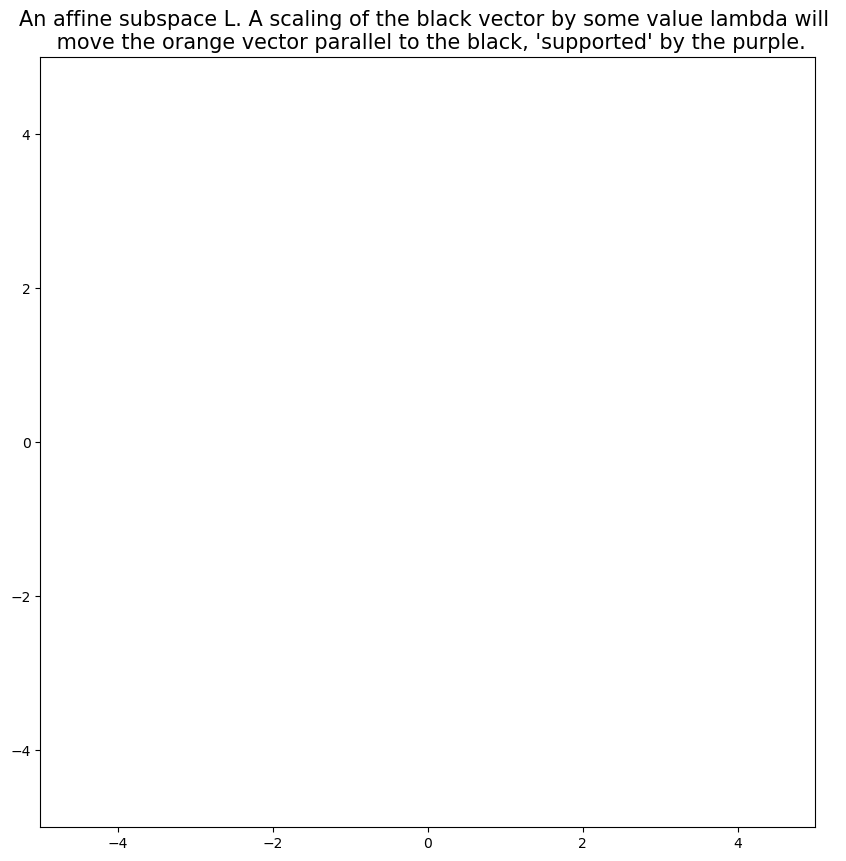

In [ ]:
# Figure setup.
scale = 10
origin = np.array([0,0])
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.title("An affine subspace L. A scaling of the black vector by some value lambda will \n move the orange vector parallel to the black, 'supported' by the purple.", size=15)
# Figure setup.

# Data setup.
lam = 1
x0 = np.array([-1,1])
x1 = np.array([3,.5])
val = x0+lam*x1
x1s = np.vstack([l*x1 for l in np.linspace(-4,4,25)]) # Grey lines
# Data setup.

# Plotting vectors.
plt.quiver(*origin, x1s[:,0],x1s[:,1], width=.003, scale=scale, color="grey")
plt.quiver(*origin, *x1, scale=scale, color="k")
plt.quiver(*origin, *x0, scale=scale, color="blueviolet")
plt.quiver(*origin, *val, scale=scale, color="orange") #L = x_0 + lambda * x_1 ; Affine subspace
# Plotting vectors.

# Plotting subspace.
# Arbitrary choice of 250 points on the subspace. Subspace is any infinite amount of points along the line.
val = np.vstack([x0+l*x1 for l in np.linspace(-4,4,250)])
plt.scatter(val[:,0],val[:,1],color="r", s = .5)
# Plotting subspace.

plt.legend(["$x_1*\lambda$",r"$x_1$",r"$x_0$","y",r"$L = x_0 + \lambda x_1$"]);